Load Data

In [416]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [417]:
import pandas as pd
df = pd.read_csv('hotel_bookings.csv')

EDA

In [418]:
print("Dataset shape: ",df.shape)

Dataset shape:  (119390, 32)


In [419]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [420]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [421]:
# Describtion of the numerical columns
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [422]:
# Describtion of all columns
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


Missing and duplicated values

In [423]:
# number of null values per column
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [424]:
# Missing percentage per column
missing = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing / len(df) * 100).round(2)
missing_percentage

,0
company,94.31
agent,13.69
country,0.41
children,0.00
arrival_date_month,0.00
arrival_date_week_number,0.00
hotel,0.00
is_canceled,0.00
stays_in_weekend_nights,0.00
arrival_date_day_of_month,0.00


In [425]:
# Number of duplicated data per column
for i in df.columns:
  print(i,"=>",df[i].duplicated().sum())

hotel => 119388
is_canceled => 119388
lead_time => 118911
arrival_date_year => 119387
arrival_date_month => 119378
arrival_date_week_number => 119337
arrival_date_day_of_month => 119359
stays_in_weekend_nights => 119373
stays_in_week_nights => 119355
adults => 119376
children => 119384
babies => 119385
meal => 119385
country => 119212
market_segment => 119382
distribution_channel => 119385
is_repeated_guest => 119388
previous_cancellations => 119375
previous_bookings_not_canceled => 119317
reserved_room_type => 119380
assigned_room_type => 119378
booking_changes => 119369
deposit_type => 119387
agent => 119056
company => 119037
days_in_waiting_list => 119262
customer_type => 119386
adr => 110511
required_car_parking_spaces => 119385
total_of_special_requests => 119384
reservation_status => 119387
reservation_status_date => 118464


Data Quality Report

In [426]:
def build_column_stats(series: pd.Series) -> dict:

    total = len(series)

    dt = str(series.dtype)
    non_null_cnt = series.count()
    missing_cnt = series.isnull().sum()
    missing_pct = (missing_cnt / total * 100).round(2)
    uniq_cnt = series.nunique(dropna=True)

    if series.dropna().empty:
        top = None
    else:
        top = series.dropna().value_counts().idxmax()

    return {
        "dtype": dt,
        "non_null": int(non_null_cnt),
        "missing": int(missing_cnt),
        "missing_pct": float(missing_pct),
        "unique": int(uniq_cnt),
        "top_value": top
    }

def data_quality_report_alt(df: pd.DataFrame) -> pd.DataFrame:
    stats_list = []
    total_rows = len(df)

    for name, ser in df.items():
        col_stats = build_column_stats(ser)
        row = {
            "column": name,
            "dtype": col_stats["dtype"],
            "non_null": col_stats["non_null"],
            "missing": col_stats["missing"],
            "missing_pct": col_stats["missing_pct"],
            "unique": col_stats["unique"],
            "top_value": col_stats["top_value"],
        }
        stats_list.append(row)

    report_df = pd.DataFrame(stats_list)
    report_df = report_df.sort_values(by="column").reset_index(drop=True)
    return report_df

report = data_quality_report_alt(df)
report.to_csv('data_quality_report.csv', index=False)
print("Saved data_quality_report.csv")
report

Saved data_quality_report.csv


,column,dtype,non_null,missing,missing_pct,unique,top_value
0,adr,float64,119390,0,0.00,8879,62.0
1,adults,int64,119390,0,0.00,14,2
2,agent,float64,103050,16340,13.69,333,9.0
3,arrival_date_day_of_month,int64,119390,0,0.00,31,17
4,arrival_date_month,object,119390,0,0.00,12,August
5,arrival_date_week_number,int64,119390,0,0.00,53,33
6,arrival_date_year,int64,119390,0,0.00,3,2016
7,assigned_room_type,object,119390,0,0.00,12,A
8,babies,int64,119390,0,0.00,5,0
9,booking_changes,int64,119390,0,0.00,21,0


In [427]:
#Issues printer
import pandas as pd
from typing import List, Optional

def collect_issues_from_quality(quality_df: pd.DataFrame, orig_df: pd.DataFrame) -> List[str]:
    issues_list: List[str] = []
    total_rows = len(orig_df)

    miss_thresh = 30.0
    highly_missing = quality_df.loc[quality_df['missing_pct'] > miss_thresh, 'column'].tolist()
    if highly_missing:
        issues_list.append(f"Columns with >{miss_thresh}% missing: {highly_missing}")


    card_thresh = total_rows * 0.5
    high_card_cols = quality_df.loc[quality_df['unique'] > card_thresh, 'column'].tolist()
    if high_card_cols:
        issues_list.append(
            f"Columns with very high cardinality (>50% rows unique): {high_card_cols}"
        )


    if issues_list:
        print("Quick issues detected:")
        for item in issues_list:
            print("-", item)
    else:
        print("No obvious automatic flags. (data_quality_report.csv).")

    return issues_list

dq = data_quality_report_alt(df)
issues = collect_issues_from_quality(dq, df)

Quick issues detected:
- Columns with >30.0% missing: ['company']


Data Visualization

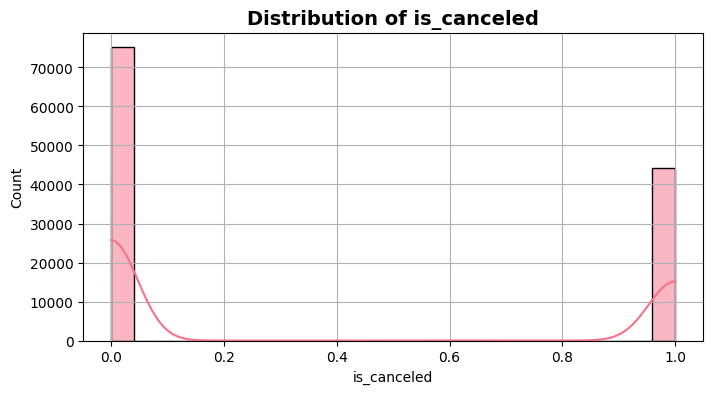

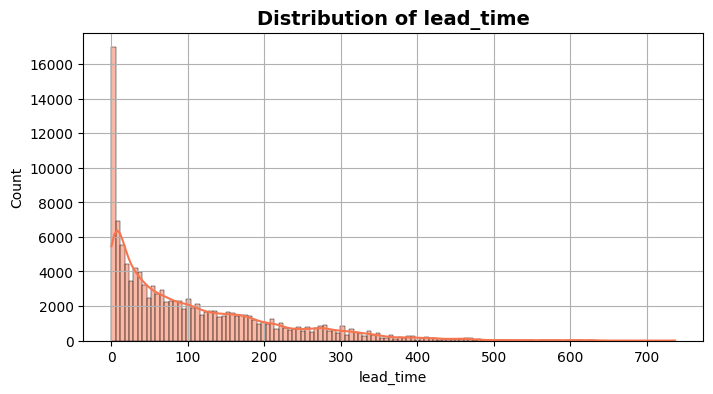

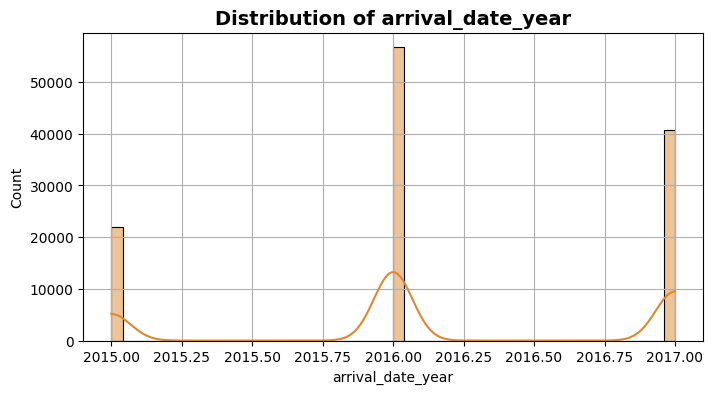

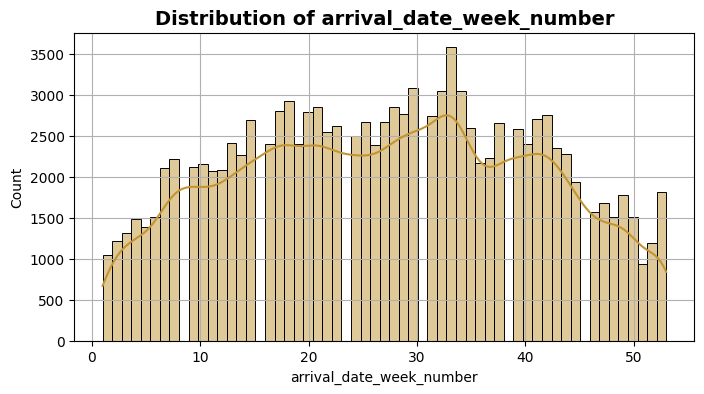

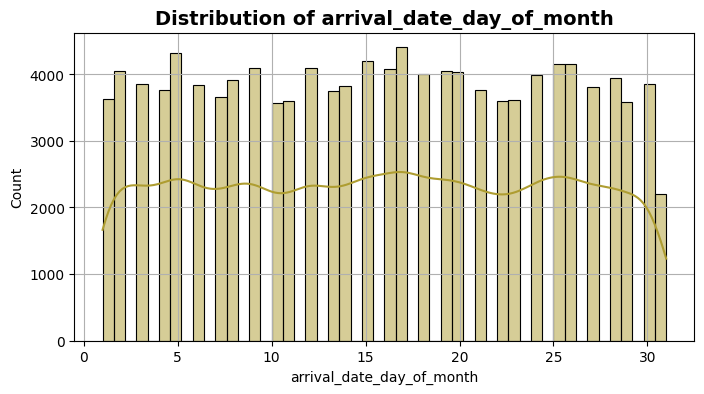

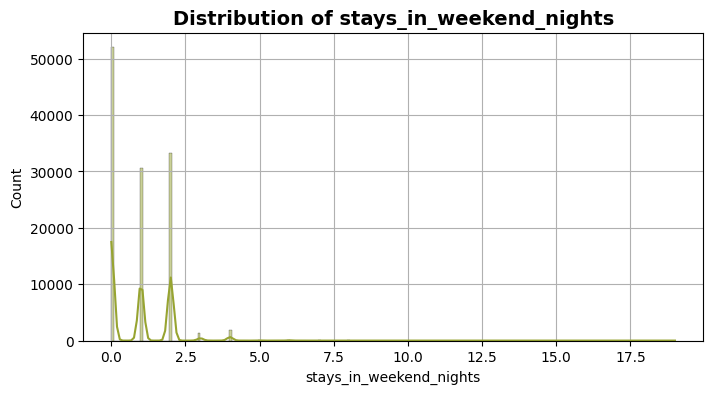

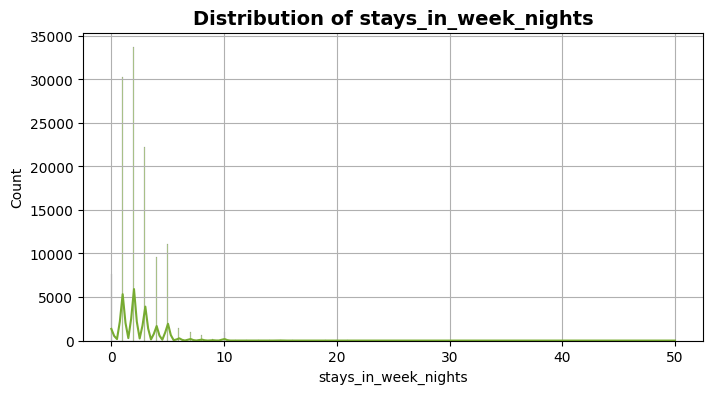

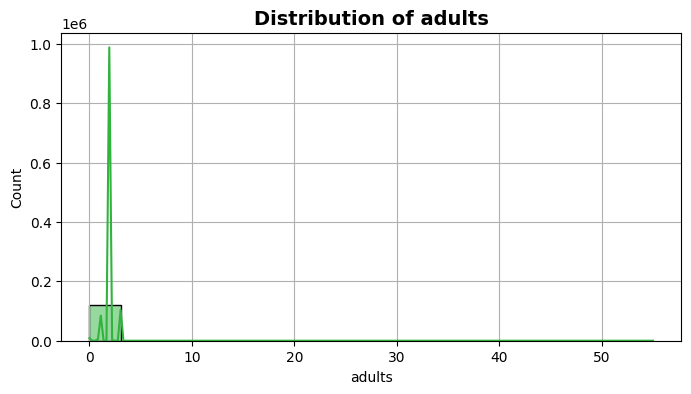

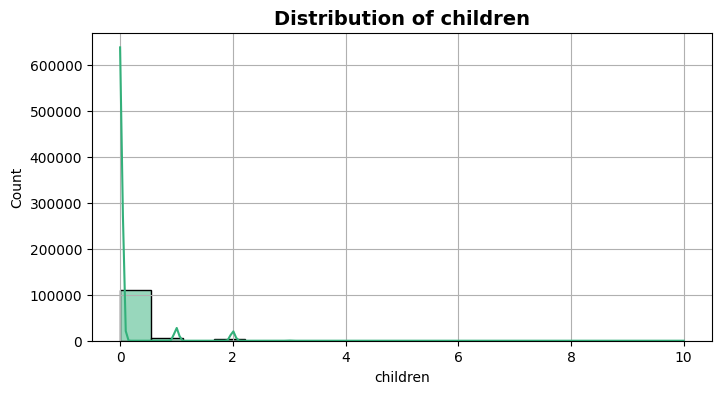

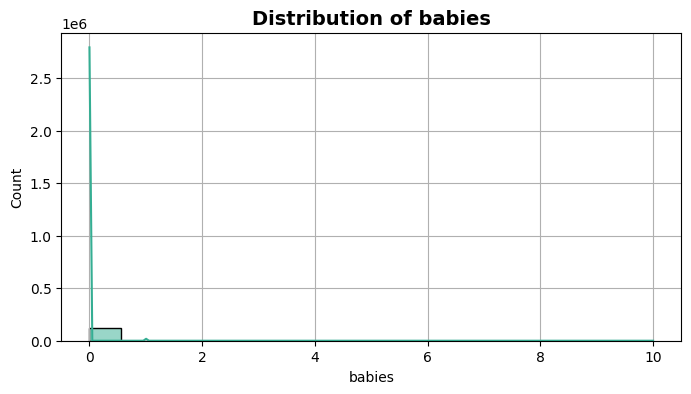

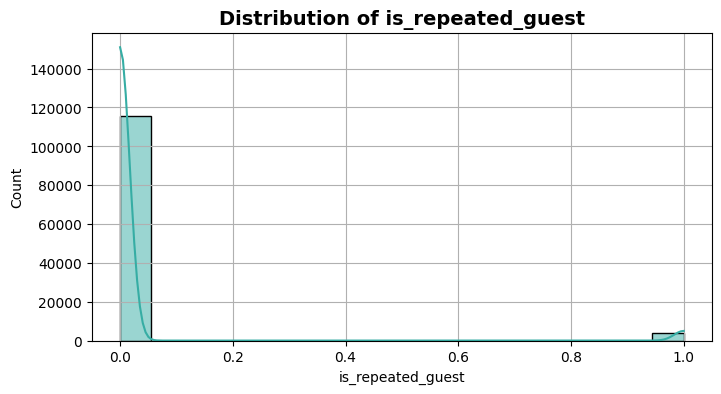

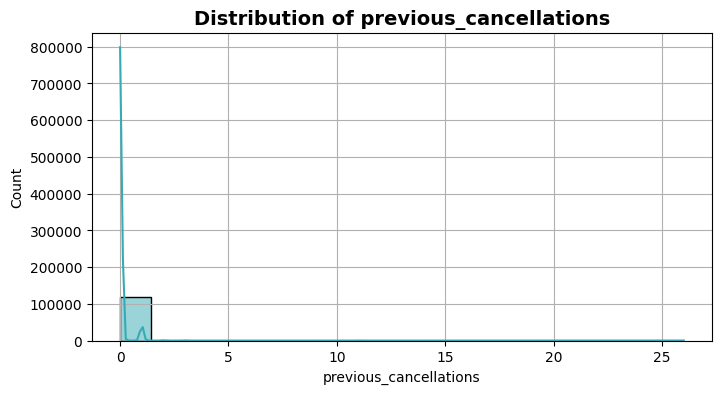

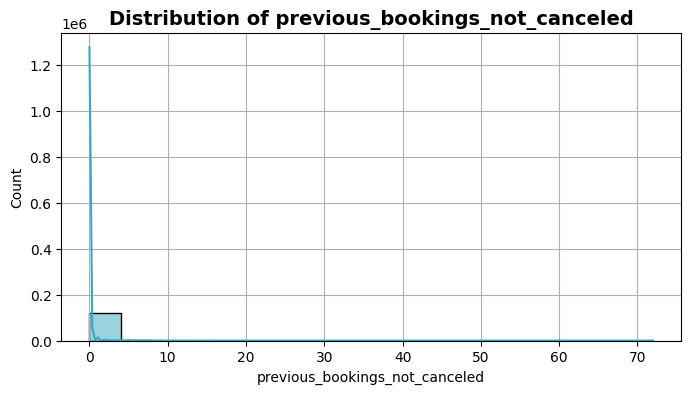

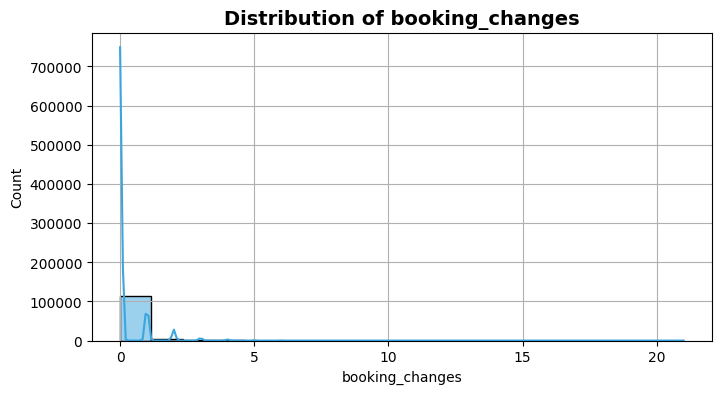

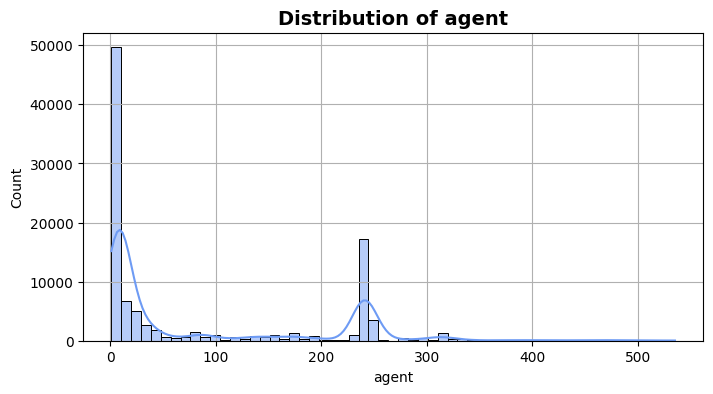

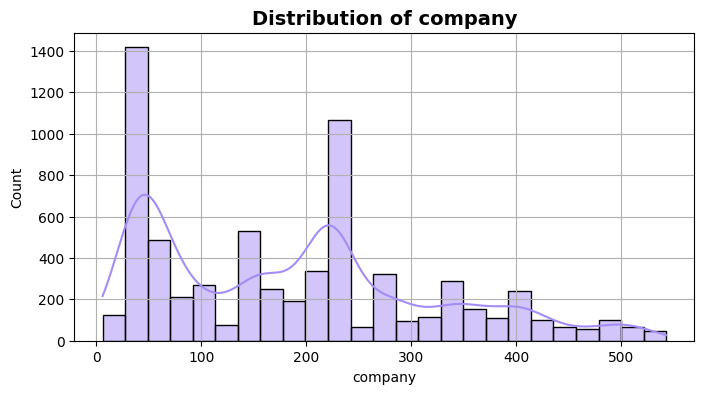

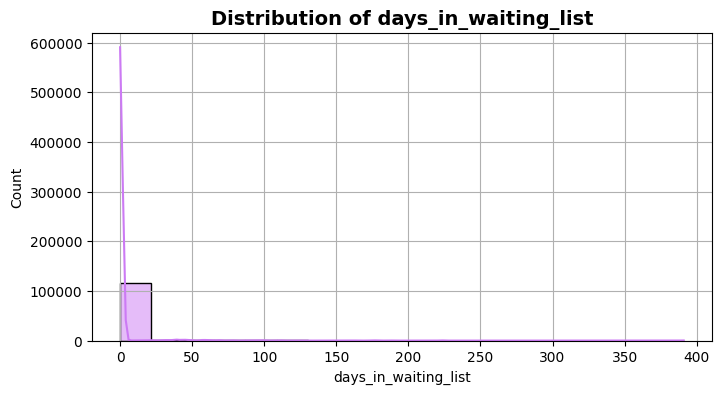

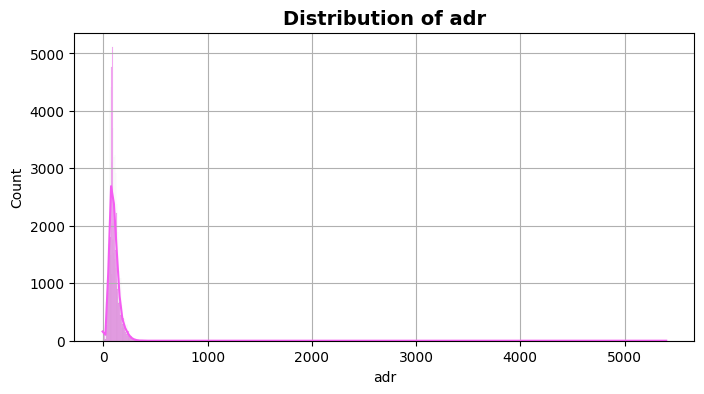

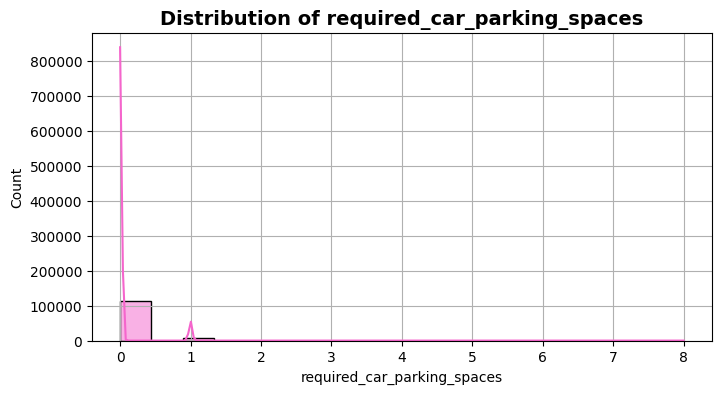

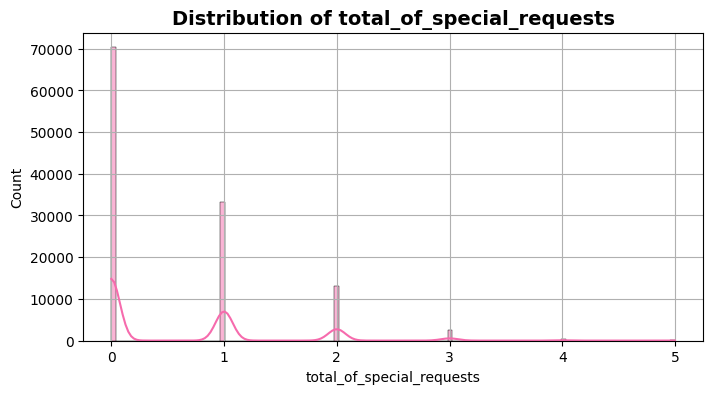

In [428]:
import seaborn as sns
import matplotlib.pyplot as plt
palette=sns.color_palette("husl",len(df.select_dtypes(include="number").columns))
for idx,col in enumerate (df.select_dtypes(include="number").columns):
  plt.figure(figsize=(8,4))
  sns.histplot(data=df,x=col,color=palette[idx],edgecolor="black",kde=True)
  plt.title(f"Distribution of {col}",fontsize=14,fontweight="bold")
  plt.grid()
  plt.show()

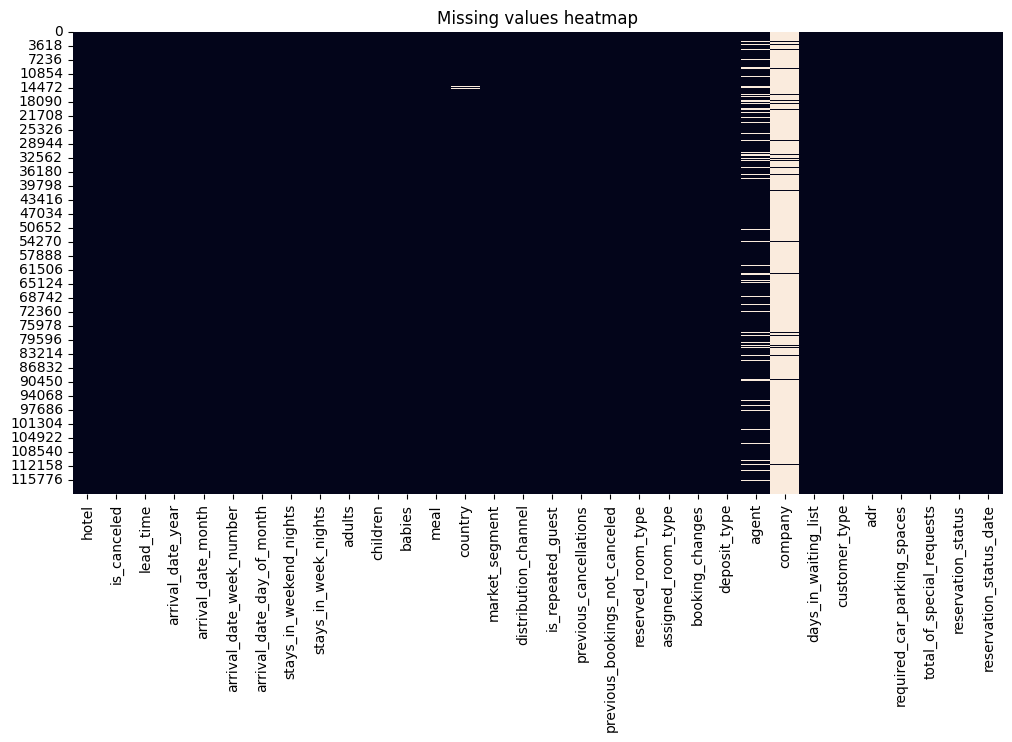

In [429]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values heatmap')
plt.show()

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


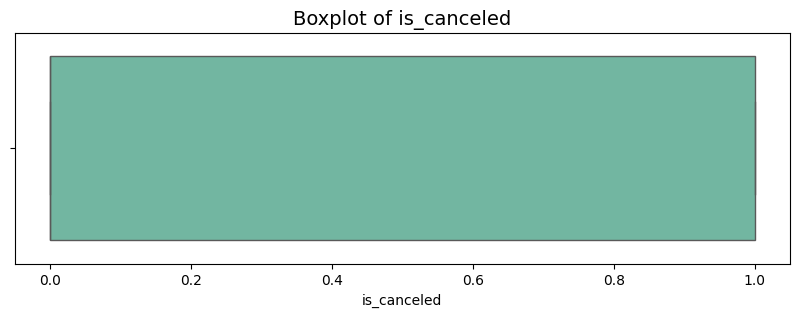

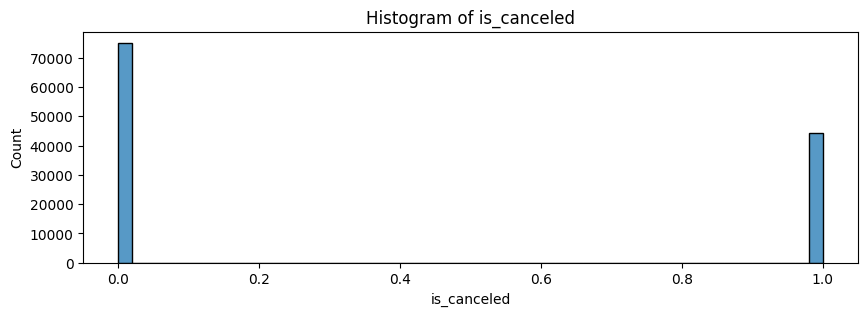

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


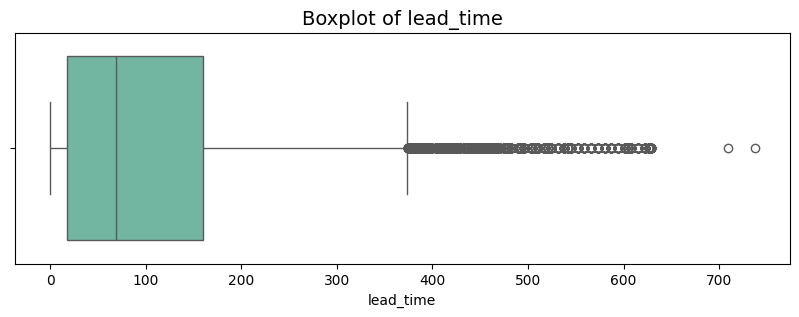

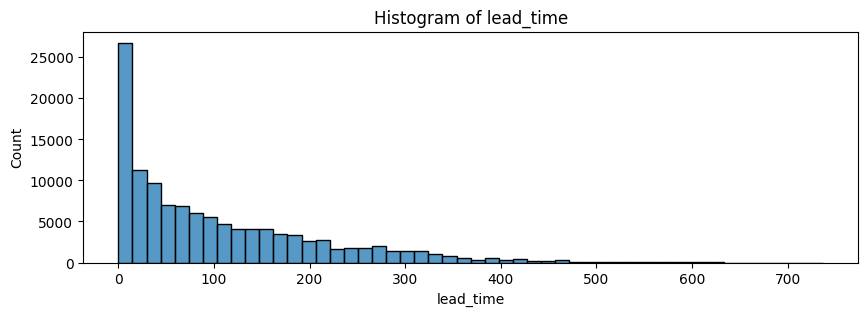

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


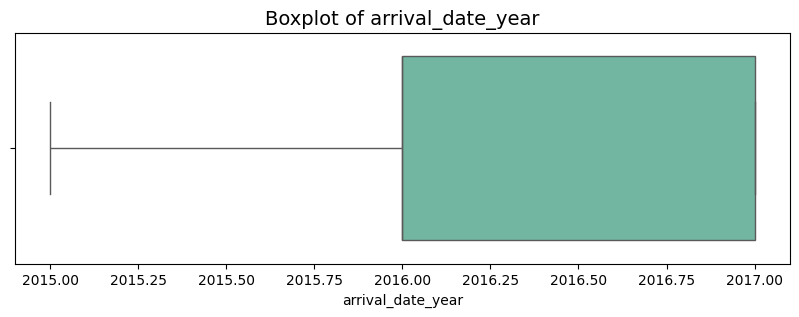

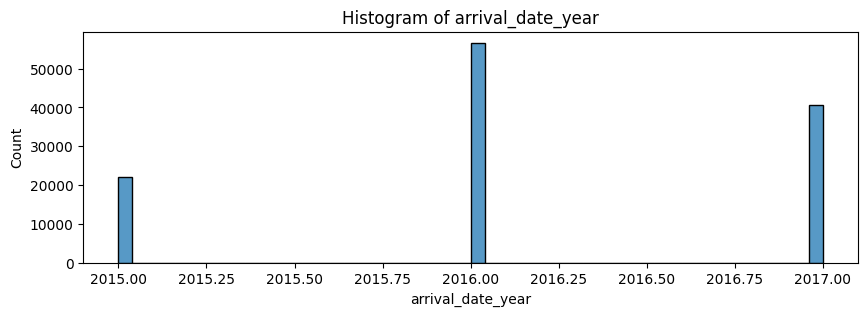

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


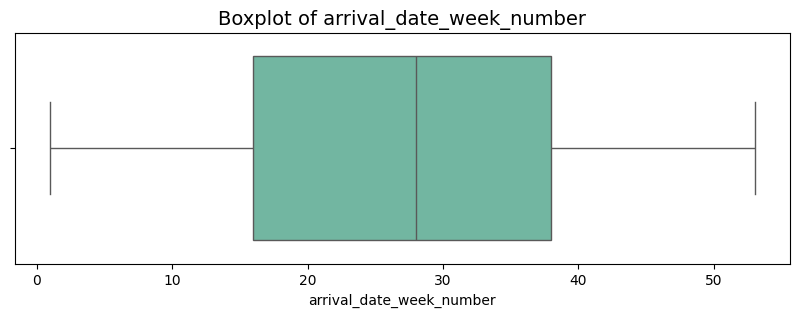

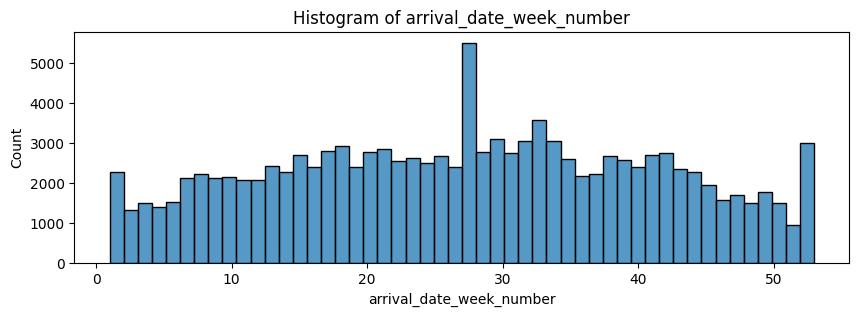

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


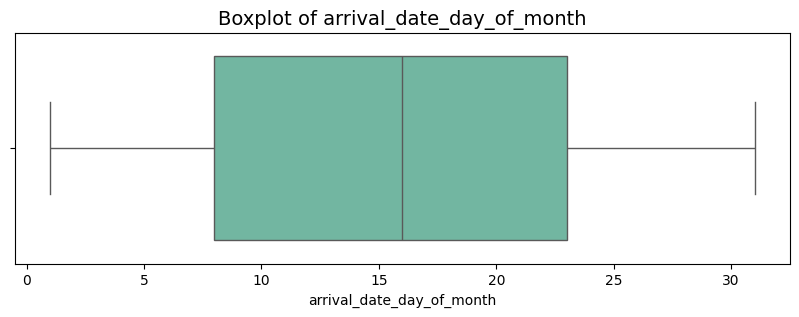

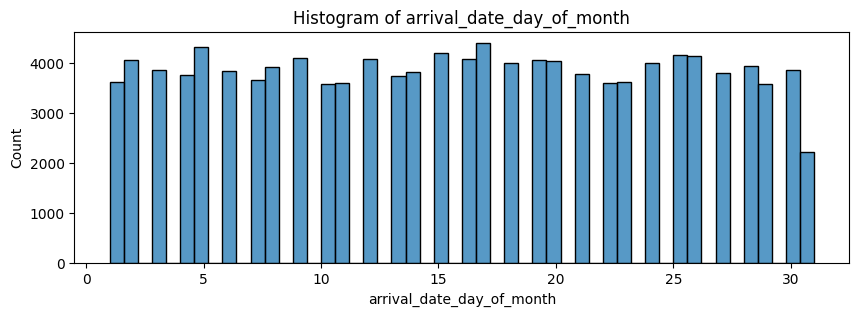

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


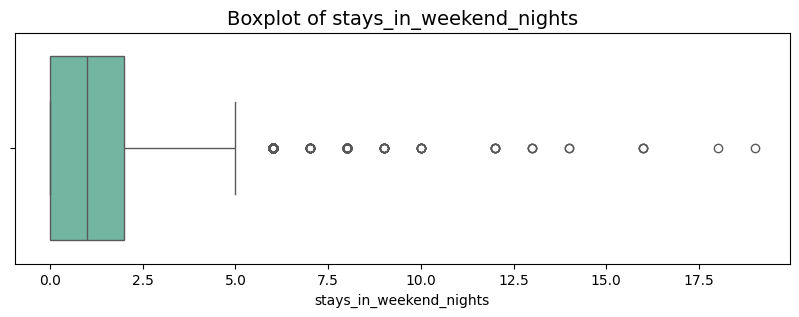

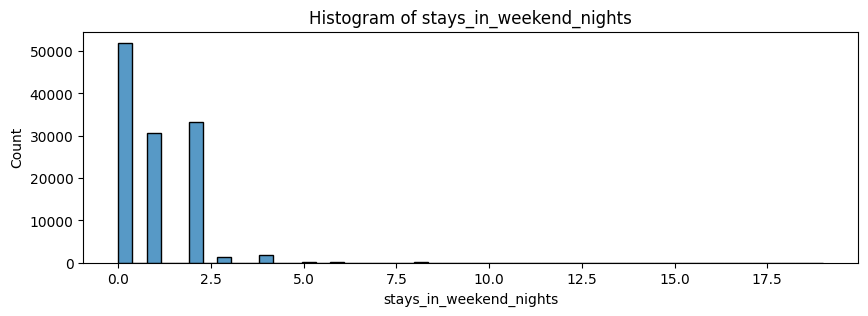

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


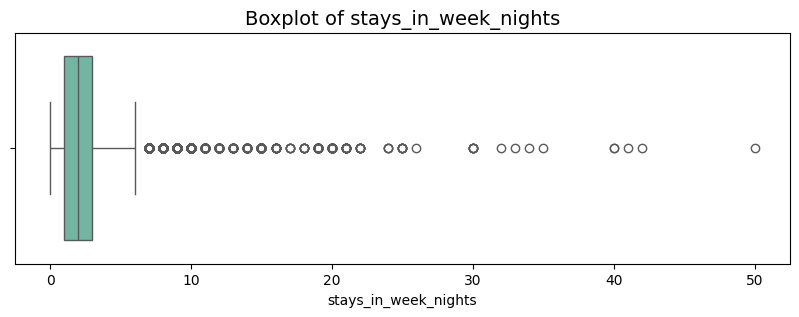

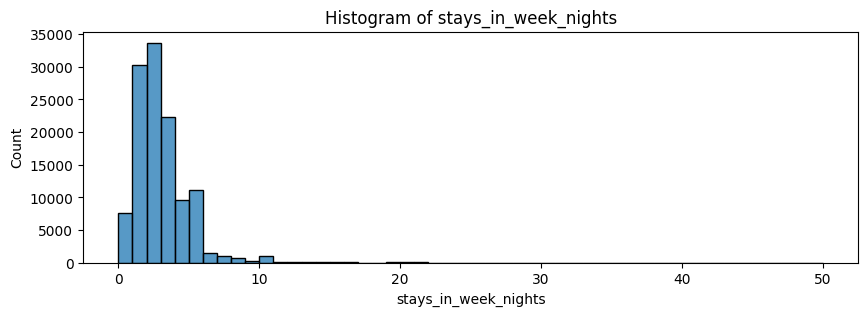

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


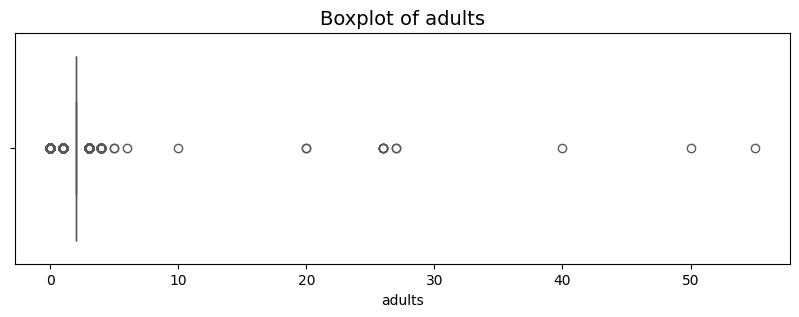

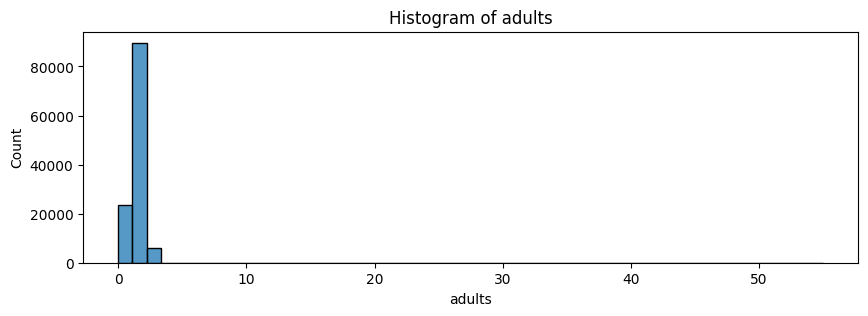

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


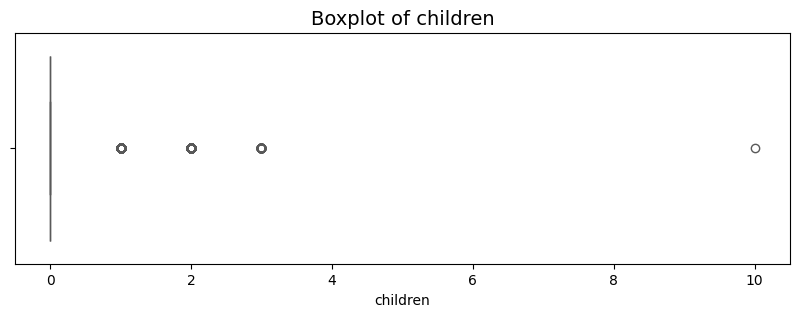

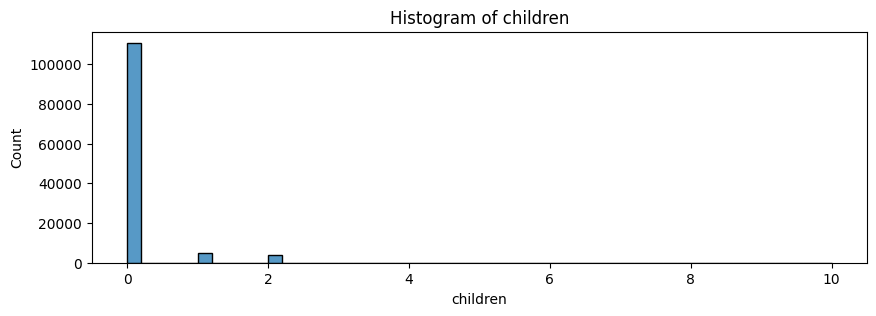

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


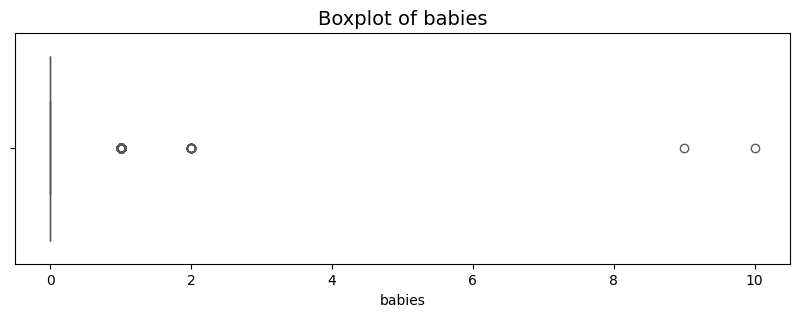

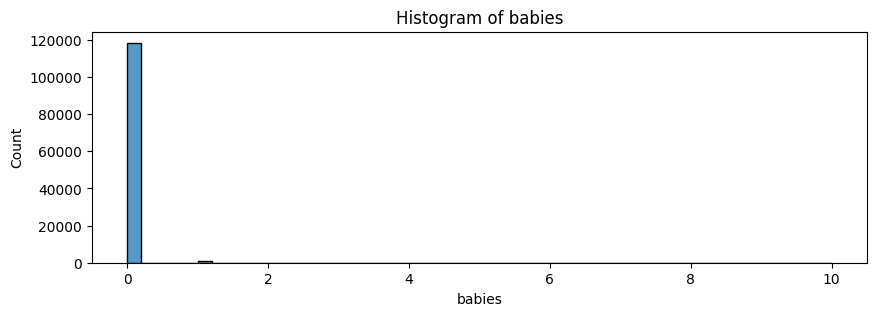

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


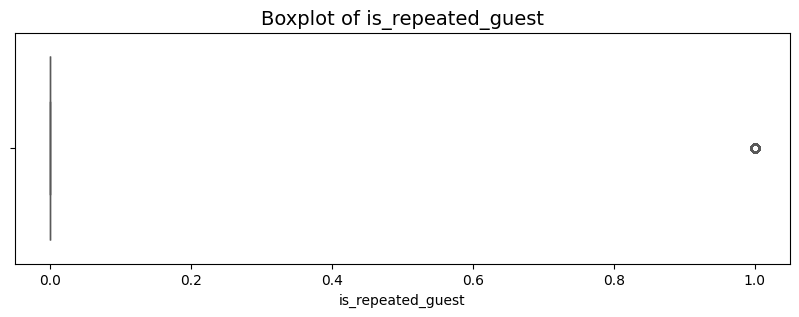

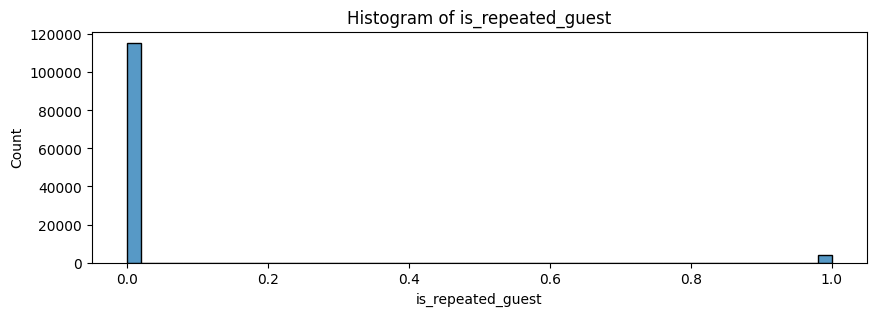

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


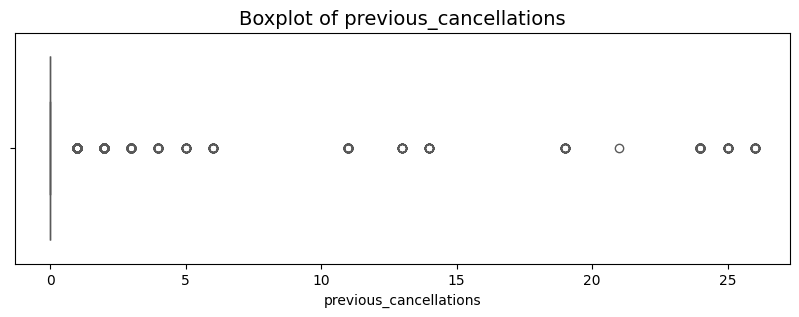

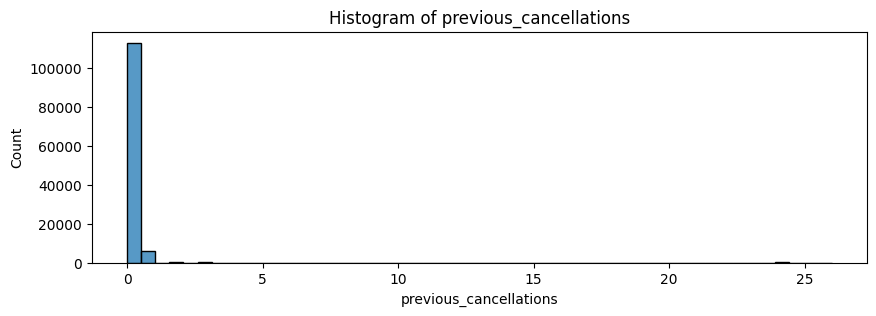

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


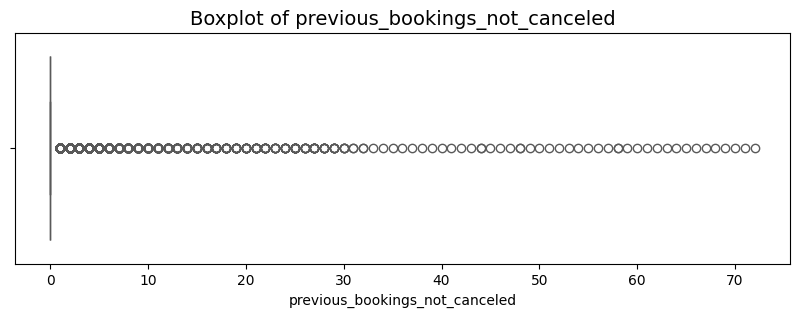

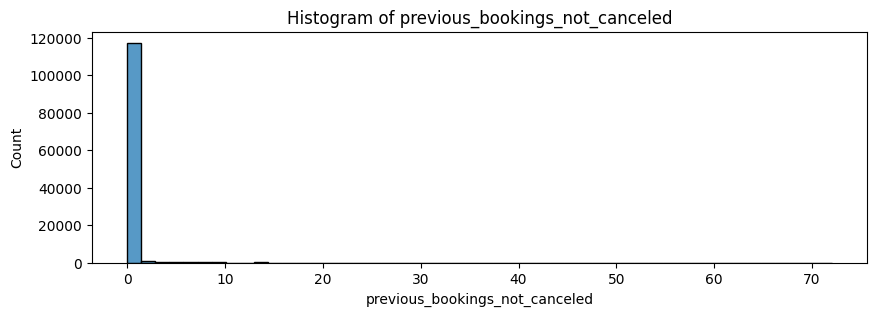

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


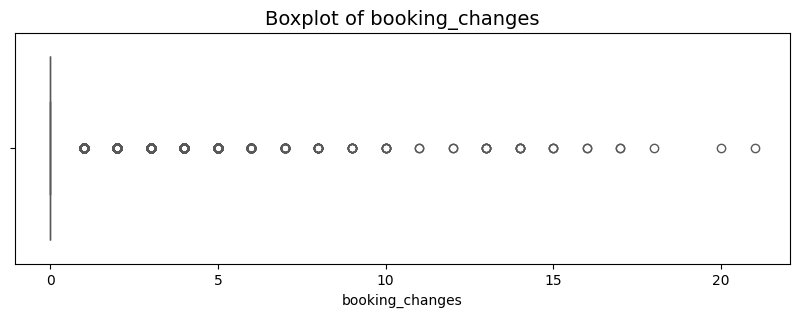

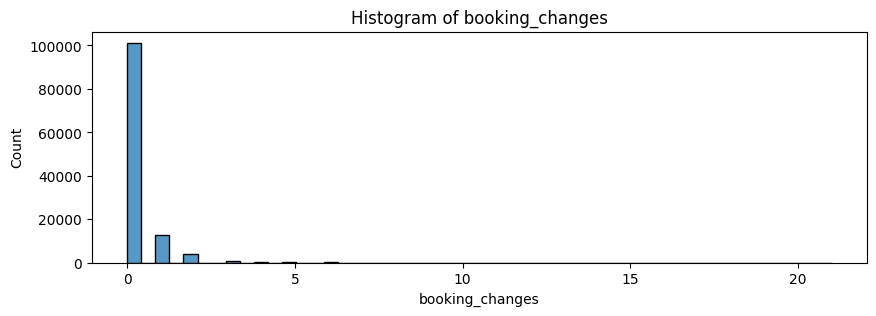

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


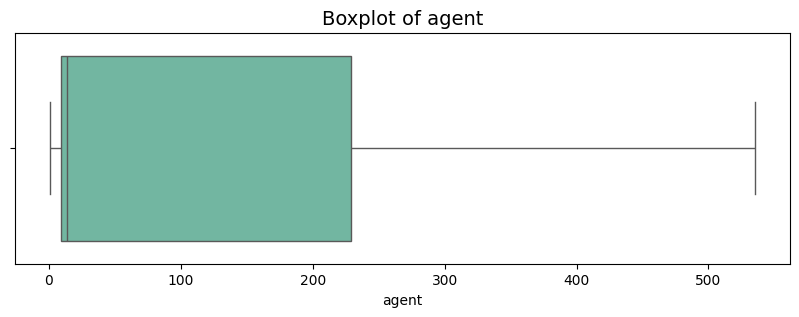

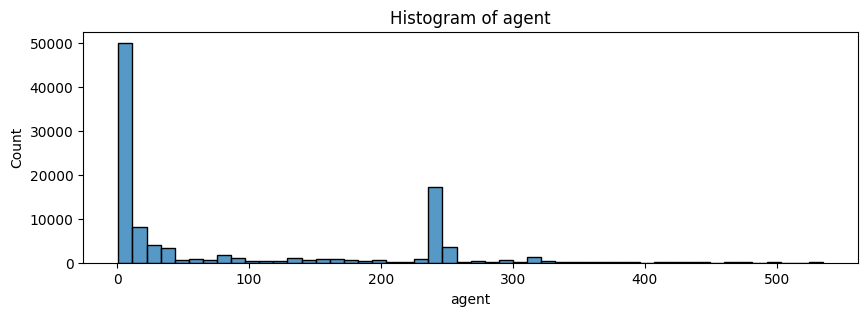

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


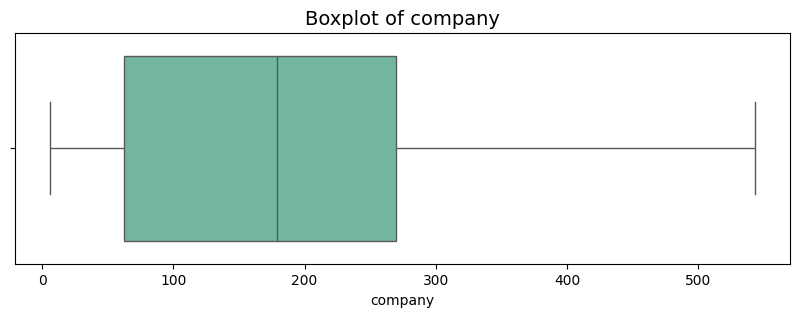

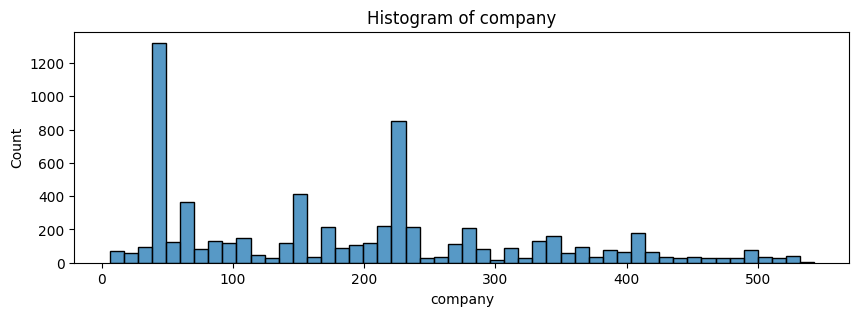

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


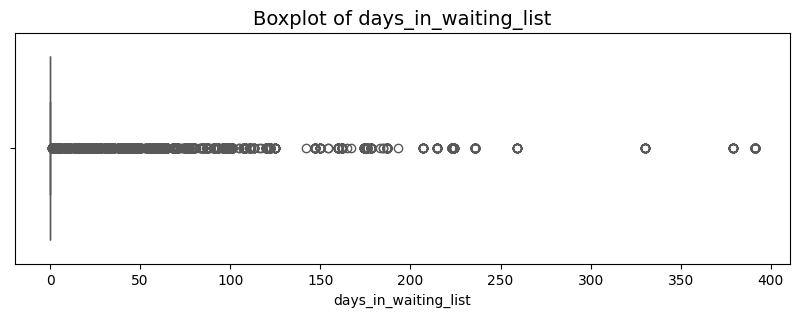

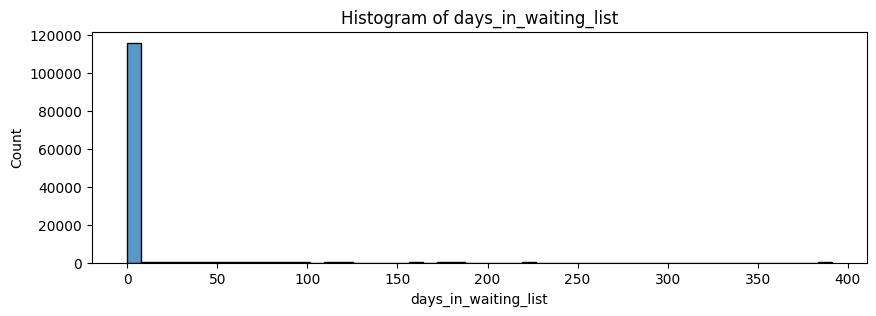

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


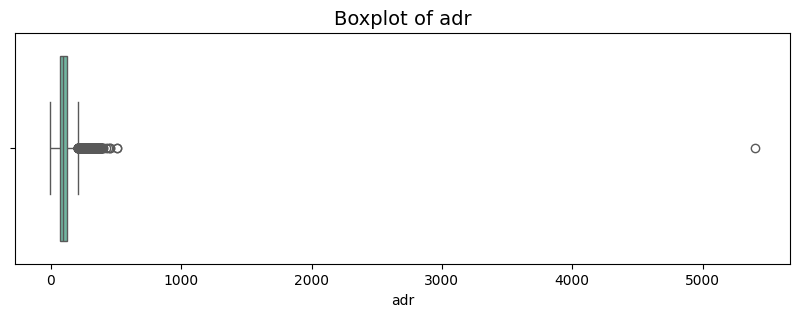

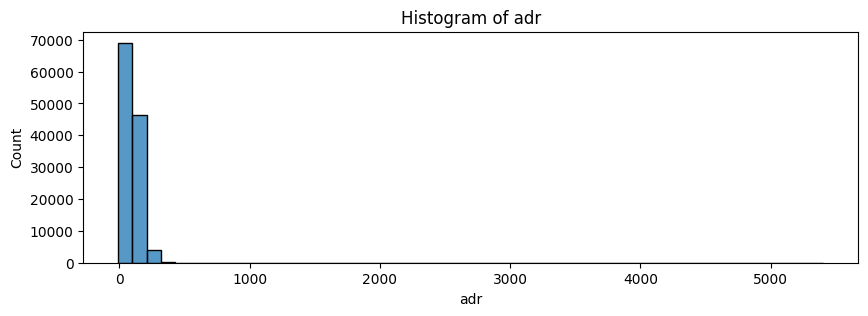

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


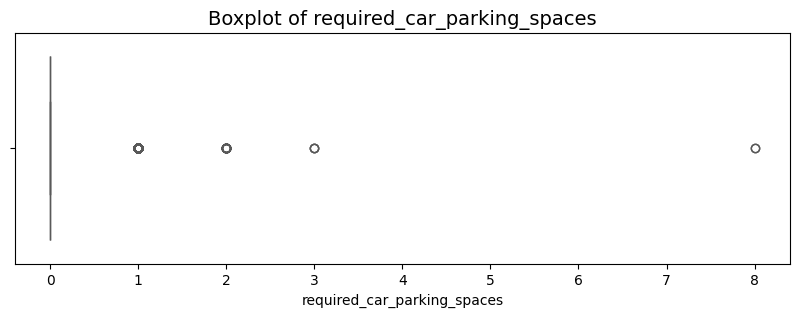

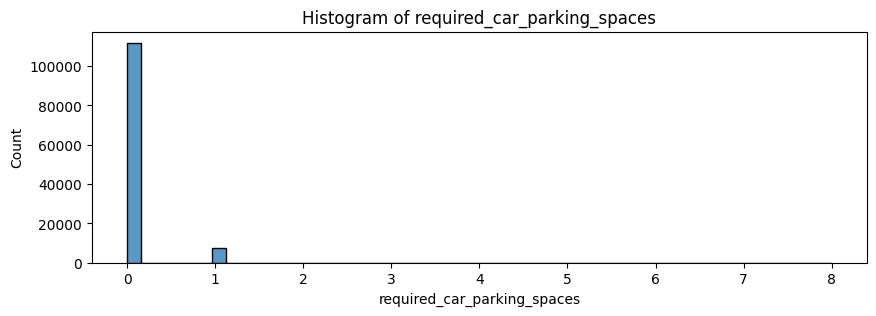

/tmp/ipython-input-3177854812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df[col],palette="Set2")


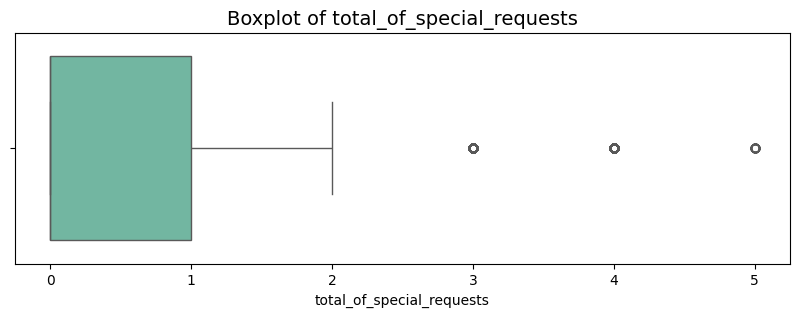

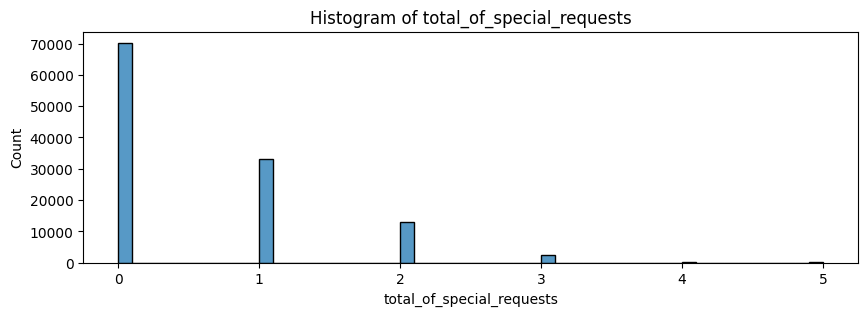

In [430]:
# Check the outliers
for col in df.select_dtypes(include="number"):
  plt.figure(figsize=(10,3))
  sns.boxplot(data=df,x=df[col],palette="Set2")
  plt.title(f"Boxplot of {col}",fontsize=14)
  plt.show()

  plt.figure(figsize=(10,3))
  sns.histplot(df[col].dropna(), bins=50)
  plt.title(f'Histogram of {col}')
  plt.show()

Data Cleaning

In [431]:
df_copy = df.copy()

In [432]:
# Impute missing values with the mean for each numerical column
for col in df_copy.select_dtypes(include="number").columns:
    df_copy[col].fillna(df_copy[col].mean(), inplace=True)
df_copy.isnull().sum()

/tmp/ipython-input-223344508.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col].fillna(df_copy[col].mean(), inplace=True)


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [433]:
# Impute missing values with the mode for country column
df_copy["country"] = df_copy["country"].fillna(df_copy['country'].mode()[0],inplace=True)
df_copy.isnull().sum()

/tmp/ipython-input-3346536679.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["country"] = df_copy["country"].fillna(df_copy['country'].mode()[0],inplace=True)


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [434]:
# Removing the duplcated columns
df_copy = df_copy.drop_duplicates()
df_copy.duplicated().sum()

np.int64(0)

In [435]:
df_copy.dtypes.head(32)

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [436]:
print("Correcting data type")
df_copy['reservation_status_date'] = pd.to_datetime(df_copy['reservation_status_date'],errors='coerce')
df_copy['children'] = df_copy['children'].astype('i')
print(df_copy[['reservation_status_date','children']].dtypes)

Correcting data type
reservation_status_date    datetime64[ns]
children                            int32
dtype: object


In [437]:
outliers_col=[]
for col in df_copy.select_dtypes(include="number").columns:
  q1 = df_copy[col].quantile(0.25)
  q3 = df_copy[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  count_outliers = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)].shape[0]
  if count_outliers > 0:
      outliers_col.append(col)

In [438]:
# Columns which have outliers
outliers_col

['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [439]:
#Handling the outhliers
def outliers_handling(df_copy: pd.DataFrame, cols: list[str]) -> None:
    for col in cols:
        s = df_copy[col]
        if not pd.api.types.is_numeric_dtype(s):
            continue

        q1 = s.quantile(0.25)
        q3 = s.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        df_copy.loc[df_copy[col] < lower_bound, col] = lower_bound
        df_copy.loc[df_copy[col] > upper_bound, col] = upper_bound

outliers_handling(df_copy, cols=outliers_col)

/tmp/ipython-input-759734441.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-158.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy.loc[df_copy[col] < lower_bound, col] = lower_bound
/tmp/ipython-input-759734441.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy.loc[df_copy[col] < lower_bound, col] = lower_bound
/tmp/ipython-input-759734441.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy.loc[df_copy[col] < lower_bound, col] = lower_bound


/tmp/ipython-input-3513044631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")


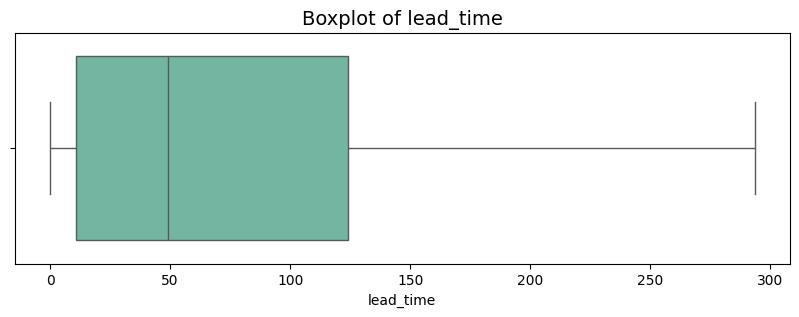

/tmp/ipython-input-3513044631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")


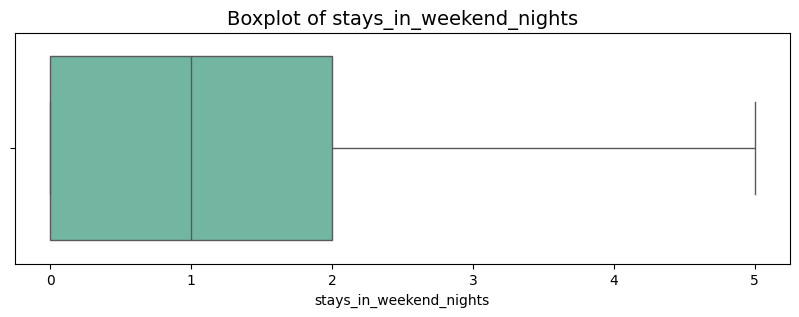

/tmp/ipython-input-3513044631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")


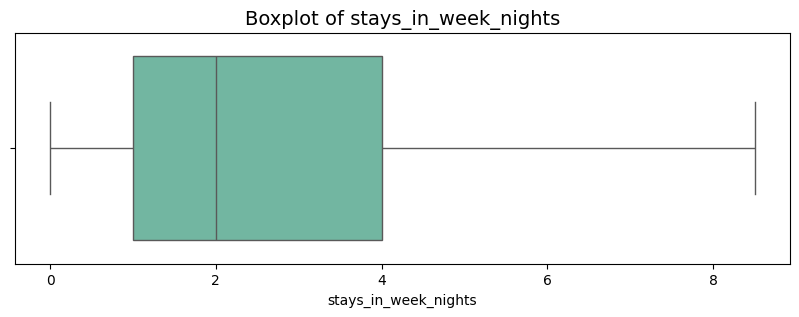

/tmp/ipython-input-3513044631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")


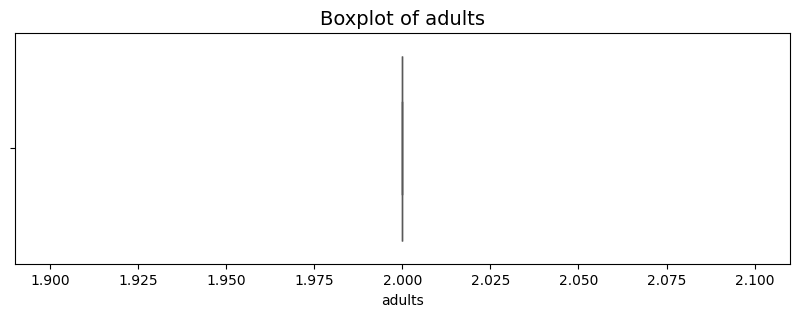

/tmp/ipython-input-3513044631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")


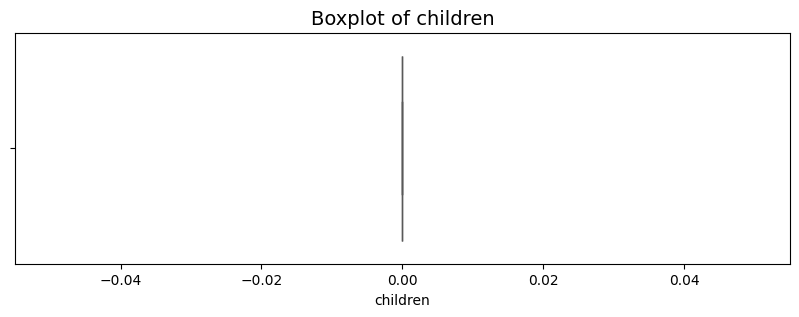

/tmp/ipython-input-3513044631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")


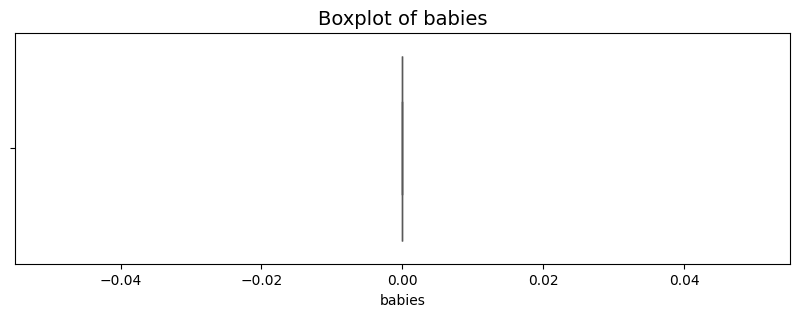

/tmp/ipython-input-3513044631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")


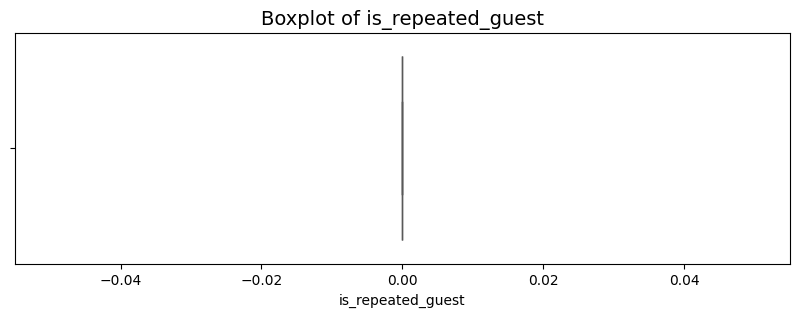

/tmp/ipython-input-3513044631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")


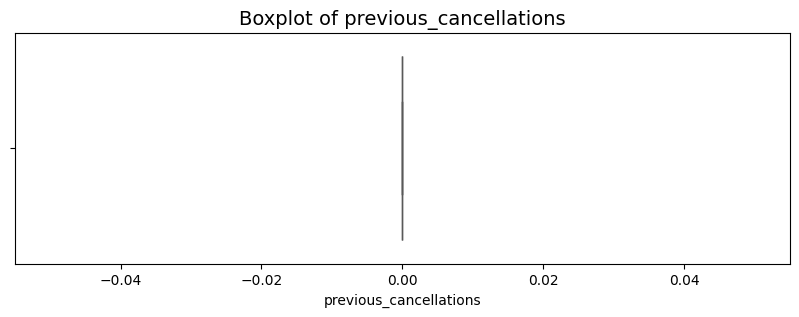

/tmp/ipython-input-3513044631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")


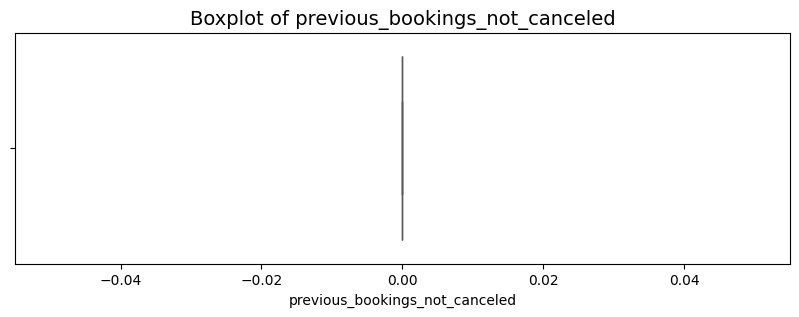

/tmp/ipython-input-3513044631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")


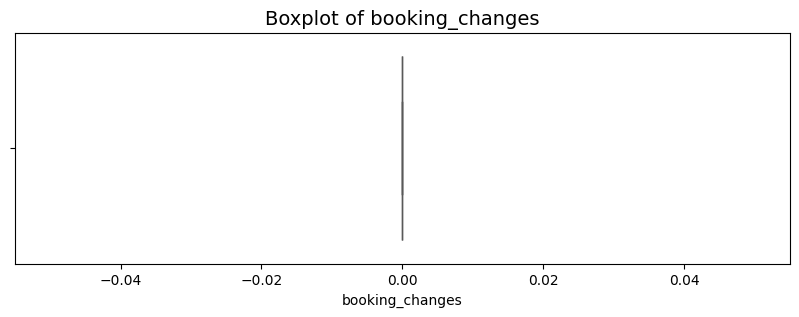

/tmp/ipython-input-3513044631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")


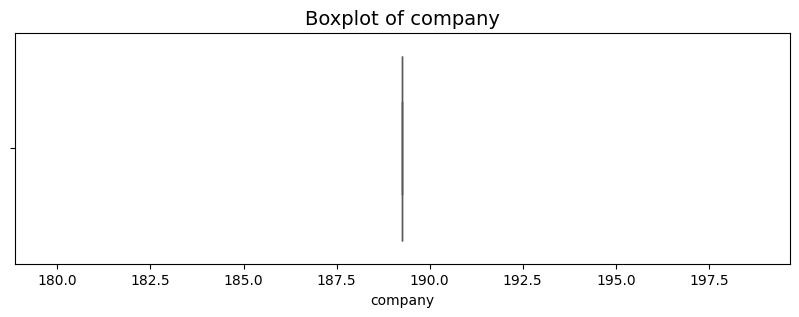

/tmp/ipython-input-3513044631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")


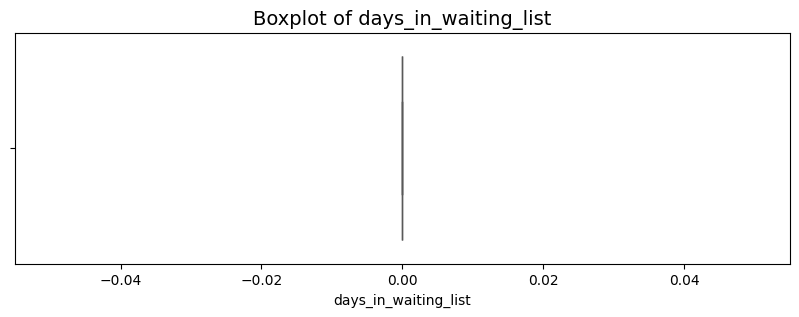

/tmp/ipython-input-3513044631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")


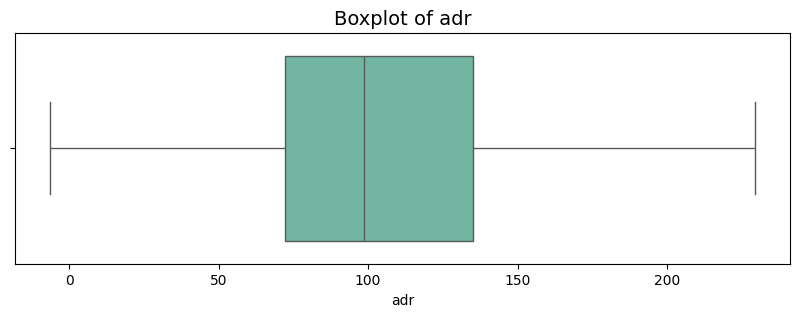

/tmp/ipython-input-3513044631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")


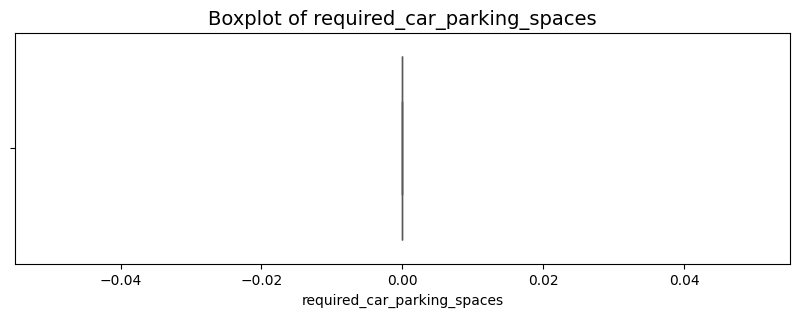

/tmp/ipython-input-3513044631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")


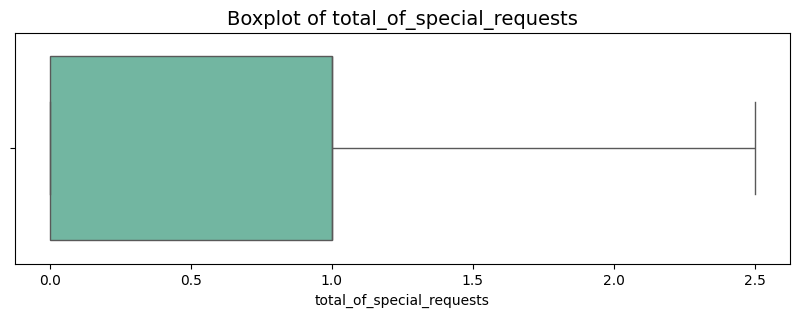

In [440]:
# Check the outliers again
for col in outliers_col:
  plt.figure(figsize=(10,3))
  sns.boxplot(data=df_copy,x=df_copy[col],palette="Set2")
  plt.title(f"Boxplot of {col}",fontsize=14)
  plt.show()

Feature Engineering

In [441]:
df_fet=df_copy.copy()
# total_guests = adults + children + babies
df_fet['total_guests'] = df_fet['adults'] + df_fet['children'].fillna(0) + df_fet['babies']

# total_nights = stays_in_weekend_nights + stays_in_week_nights
df_fet['total_nights'] = df_fet['stays_in_weekend_nights'] + df_fet['stays_in_week_nights']

# is_family
df_fet['is_family'] = np.where((df_fet['children'] + df_fet['babies']) > 0, 1, 0)
df_fet['is_family'].unique()

array([0])

In [442]:
df_fet.dtypes

,0
hotel,object
is_canceled,int64
lead_time,float64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,float64
adults,int64


In [443]:
#Encode Categorical Variables
from sklearn.preprocessing import OneHotEncoder
df_copy = pd.get_dummies(df_copy, columns=['meal', 'market_segment'], drop_first=True)
country_freq = df['country'].value_counts(normalize=True)
df_copy['country_encoded'] = df_copy['country'].map(country_freq)
rare_countries = country_freq[country_freq < 0.01].index
df_copy['country_grouped'] = df_copy['country'].replace(rare_countries, 'Other')

In [444]:
#Remove leakage
df_copy = df_copy.drop(['reservation_status', 'reservation_status_date'], axis=1)

In [445]:
# Final Preparation : Split cleaned dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [446]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)
print("All datasets saved!")

All datasets saved!
